## World Happiness Report Project

### Project Description


The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### Objective: To predict the happiness score considering all the other factors mentioned in the dataset

#### Dataset Link- https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/World%20Happiness/happiness_score_dataset.csv

In [349]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

In [350]:
os.chdir("F:\\FlipRobo\\Projects\\World happiness score\\")
df=pd.read_csv("happiness_score_dataset.csv", na_values=["?"])
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [351]:
df1=df.copy()   # To create a copy of the dataframe so as not to affect the original dataframe
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Exploratory data analysis

In [352]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### Observation: "Country" and "Region" are object data type, which was expected. Rest all the data types are as expected. 

In [353]:
a=df1[df1.columns[5:11]].sum(axis=1)  # 'Economy (GDP per Capita)' + 'Family' + 'Health (Life Expectancy)' + 'Freedom' + 'Trust (Government Corruption)' + 'Generosity'
a

0      5.06958
1      4.85891
2      5.03504
3      5.05691
4      4.97518
        ...   
153    2.79462
154    1.70681
155    2.67771
156    1.07152
157    1.27171
Length: 158, dtype: float64

In [354]:
b=df1['Happiness Score']  # 'Happiness Score' 
b

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [355]:
c=b-a
c

0      2.51742
1      2.70209
2      2.49196
3      2.46509
4      2.45182
        ...   
153    0.67038
154    1.63319
155    0.32829
156    1.83348
157    1.56729
Length: 158, dtype: float64

#### Observation: As per the definition, it is clear that,
####   'Dystopia Residual' =  'Happiness Score' - ( 'Economy (GDP per Capita)' + 'Family' + 'Health (Life Expectancy)' + 'Freedom' + 'Trust (Government Corruption)' + 'Generosity'). Therefore,

#### (i) 'Dystopia Residual' is not an independent variable.
#### (ii) 'Country' , 'Happiness Rank' , 'Standard Error' do not contribute to 'Happiness Score'.

#### Therefore we drop the variables  'Country' , 'Happiness Rank', and  'Dystopia Residual'. However , we retain  'Standard Error'. 

### Dropping variables 'Country' , 'Happiness Rank' and 'Dystopia Residual'

In [356]:
df2=df1.drop(['Country','Happiness Rank','Dystopia Residual'], axis = 1, inplace =False)
df2

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [357]:
df2.nunique()

Region                            10
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
dtype: int64

#### Observation: Clearly,
#### (1) Categorical variable: 'Region'
#### (2) Continuous variables: 'Happiness Score' , 'Standard Error' , 'Economy (GDP per Capita)' , 'Family' , 'Health (Life Expectancy)' ,  'Freedom' , 'Trust (Government Corruption)', 'Generosity'

#### Observation: There are no null values. So there is no need to impute the values.

In [358]:
df2.describe(include='all')

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
unique,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,NaN,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,NaN,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,NaN,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,NaN,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883


## Visualization

### Checking for skewness

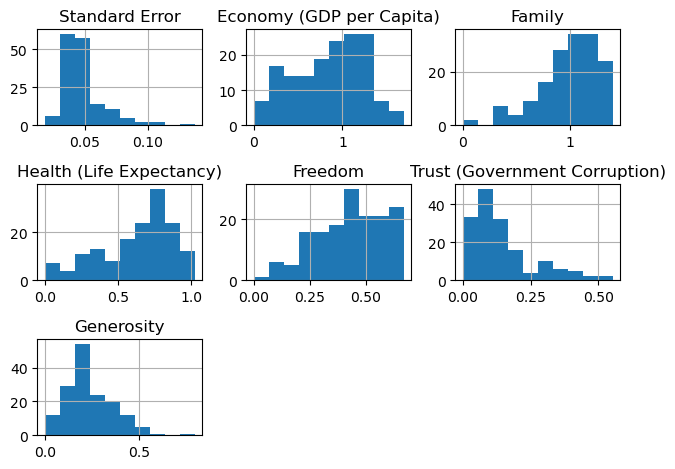

In [359]:
df2[['Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']].hist()
plt.tight_layout()
plt.show()

In [360]:
for i, col in enumerate(continuous_variables):
    skew = df2[col].skew()
    print(f'({i+1}) Skewness of {col}: {skew: .2f}')

(1) Skewness of Standard Error:  1.98
(2) Skewness of Economy (GDP per Capita): -0.32
(3) Skewness of Family: -1.01
(4) Skewness of Health (Life Expectancy): -0.71
(5) Skewness of Freedom: -0.41
(6) Skewness of Trust (Government Corruption):  1.39
(7) Skewness of Generosity:  1.00


#### Observation: As all the features are skewed, therefore there is a need of transformation.

### Reducing skewness: Using Box-Cox transformation of the continuous variables

In [361]:
from scipy.stats import boxcox
df3=pd.DataFrame()
for i in df2[continuous_variables]:
    coll, lambda_value = boxcox(df1[i] + 1)
    df3[i]=coll
    skewness5 = pd.Series(coll).skew()
    print(f"Skewness of {i}:", skewness5)

Skewness of Standard Error: -0.020091625590107968
Skewness of Economy (GDP per Capita): -0.12723345265207398
Skewness of Family: -0.16965139991672742
Skewness of Health (Life Expectancy): -0.18318121021219572
Skewness of Freedom: -0.08072799727186704
Skewness of Trust (Government Corruption): 0.18596498279151047
Skewness of Generosity: 0.01332005285757585


In [362]:
df3.skew()

Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
dtype: float64

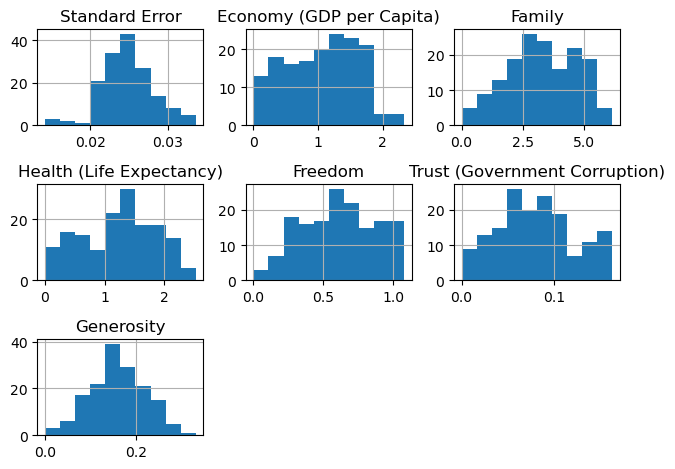

In [363]:
df3[['Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']].hist()
plt.tight_layout()
plt.show()

#### Observation: Clearly, the skewness of the features have considerably reduced after box cox transformation.

### Check for multicollinearity

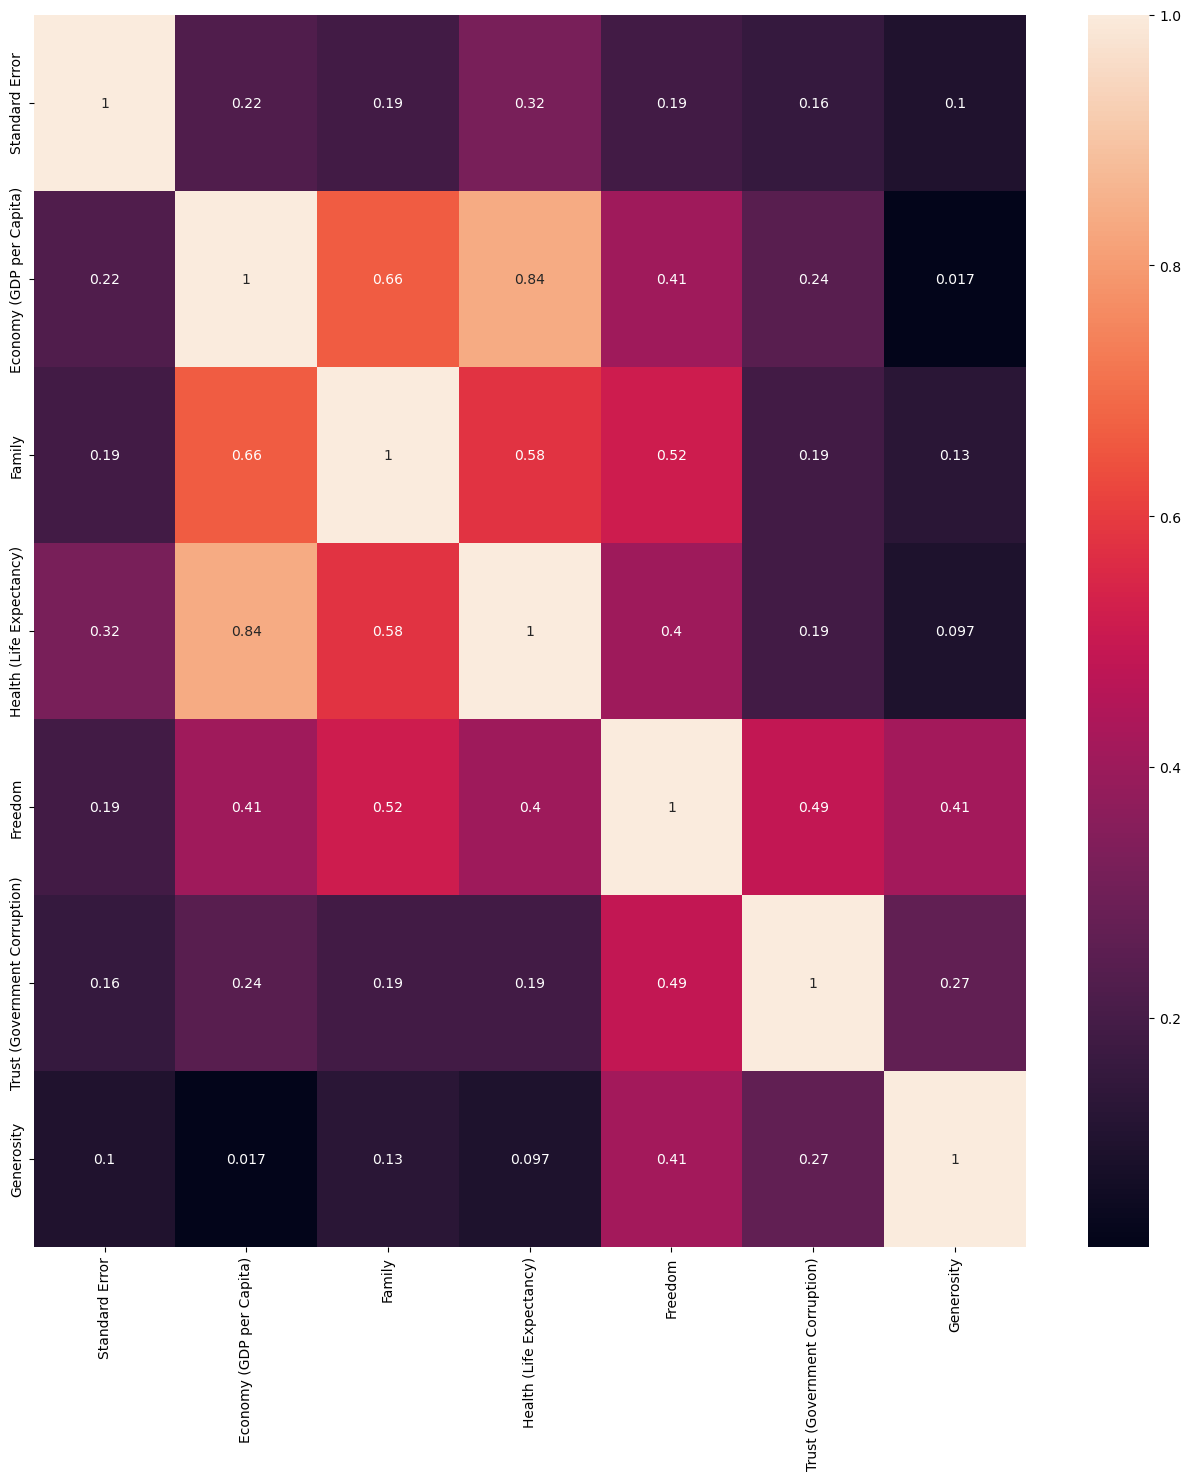

In [364]:
plt.figure(figsize=(16,16))
sns.heatmap(abs(df3[['Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']].corr()), annot=True)  # Taking absolute value of correlation coefficient
plt.show()

#### Observation: Economy (GDP per Capita) is highly correlated with Health (Life Expectancy) (= 0.84) and Family ( = 0.66). However, these features have been retained.

In [365]:
df4 = pd.concat([df3[['Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']], df2[['Happiness Score','Region']]], axis=1)
df4

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Region
0,0.021419,1.845566,5.691972,2.179346,1.069838,0.153413,0.198464,7.587,Western Europe
1,0.025790,1.696160,6.186694,2.204887,0.987393,0.093425,0.250490,7.561,Western Europe
2,0.021113,1.732596,5.793505,1.923489,1.033200,0.158877,0.216981,7.527,Western Europe
3,0.023018,1.946462,5.524497,1.962746,1.079346,0.147242,0.219169,7.522,Western Europe
4,0.021926,1.733874,5.450357,2.039891,0.996652,0.142283,0.257230,7.427,North America
...,...,...,...,...,...,...,...,...,...
153,0.021611,0.234980,1.899117,0.649256,0.907990,0.163241,0.164709,3.465,Sub-Saharan Africa
154,0.022281,0.307956,0.547704,0.437142,0.692303,0.062574,0.140503,3.340,Sub-Saharan Africa
155,0.026096,0.772139,0.844861,1.405981,0.177350,0.110826,0.261297,3.006,Middle East and Northern Africa
156,0.031307,0.015363,0.691739,0.280306,0.130121,0.074172,0.148946,2.905,Sub-Saharan Africa


### Categorical to numerical encoding: Using one hot encoding of variable 'Region'

In [366]:
df_encoded=pd.get_dummies(df4, columns=['Region'])
df_encoded

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,0.021419,1.845566,5.691972,2.179346,1.069838,0.153413,0.198464,7.587,0,0,0,0,0,0,0,0,0,1
1,0.025790,1.696160,6.186694,2.204887,0.987393,0.093425,0.250490,7.561,0,0,0,0,0,0,0,0,0,1
2,0.021113,1.732596,5.793505,1.923489,1.033200,0.158877,0.216981,7.527,0,0,0,0,0,0,0,0,0,1
3,0.023018,1.946462,5.524497,1.962746,1.079346,0.147242,0.219169,7.522,0,0,0,0,0,0,0,0,0,1
4,0.021926,1.733874,5.450357,2.039891,0.996652,0.142283,0.257230,7.427,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.021611,0.234980,1.899117,0.649256,0.907990,0.163241,0.164709,3.465,0,0,0,0,0,0,0,0,1,0
154,0.022281,0.307956,0.547704,0.437142,0.692303,0.062574,0.140503,3.340,0,0,0,0,0,0,0,0,1,0
155,0.026096,0.772139,0.844861,1.405981,0.177350,0.110826,0.261297,3.006,0,0,0,0,1,0,0,0,0,0
156,0.031307,0.015363,0.691739,0.280306,0.130121,0.074172,0.148946,2.905,0,0,0,0,0,0,0,0,1,0


In [367]:
df_encoded.columns

Index(['Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Happiness Score', 'Region_Australia and New Zealand',
       'Region_Central and Eastern Europe', 'Region_Eastern Asia',
       'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Europe'],
      dtype='object')

In [368]:
df_encoded.isnull().sum()

Standard Error                            0
Economy (GDP per Capita)                  0
Family                                    0
Health (Life Expectancy)                  0
Freedom                                   0
Trust (Government Corruption)             0
Generosity                                0
Happiness Score                           0
Region_Australia and New Zealand          0
Region_Central and Eastern Europe         0
Region_Eastern Asia                       0
Region_Latin America and Caribbean        0
Region_Middle East and Northern Africa    0
Region_North America                      0
Region_Southeastern Asia                  0
Region_Southern Asia                      0
Region_Sub-Saharan Africa                 0
Region_Western Europe                     0
dtype: int64

#### Splitting the dataframe as features and targets

In [369]:
X=df_encoded[['Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity',
       'Region_Australia and New Zealand', 'Region_Central and Eastern Europe',
       'Region_Eastern Asia', 'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Europe']]
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,0.021419,1.845566,5.691972,2.179346,1.069838,0.153413,0.198464,0,0,0,0,0,0,0,0,0,1
1,0.025790,1.696160,6.186694,2.204887,0.987393,0.093425,0.250490,0,0,0,0,0,0,0,0,0,1
2,0.021113,1.732596,5.793505,1.923489,1.033200,0.158877,0.216981,0,0,0,0,0,0,0,0,0,1
3,0.023018,1.946462,5.524497,1.962746,1.079346,0.147242,0.219169,0,0,0,0,0,0,0,0,0,1
4,0.021926,1.733874,5.450357,2.039891,0.996652,0.142283,0.257230,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.021611,0.234980,1.899117,0.649256,0.907990,0.163241,0.164709,0,0,0,0,0,0,0,0,1,0
154,0.022281,0.307956,0.547704,0.437142,0.692303,0.062574,0.140503,0,0,0,0,0,0,0,0,1,0
155,0.026096,0.772139,0.844861,1.405981,0.177350,0.110826,0.261297,0,0,0,0,1,0,0,0,0,0
156,0.031307,0.015363,0.691739,0.280306,0.130121,0.074172,0.148946,0,0,0,0,0,0,0,0,1,0


In [370]:
y=df_encoded['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

### Scaling the features

In [371]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X1=scaler.fit_transform(X)
X2=pd.DataFrame(X1, columns=X.columns)
X2

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,-0.113228,-0.474137,-0.19868,-0.4022,-0.380693,-0.113228,-0.24577,-0.215308,-0.582223,2.554175
1,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,-0.113228,-0.474137,-0.19868,-0.4022,-0.380693,-0.113228,-0.24577,-0.215308,-0.582223,2.554175
2,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,-0.113228,-0.474137,-0.19868,-0.4022,-0.380693,-0.113228,-0.24577,-0.215308,-0.582223,2.554175
3,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,-0.113228,-0.474137,-0.19868,-0.4022,-0.380693,-0.113228,-0.24577,-0.215308,-0.582223,2.554175
4,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,-0.113228,-0.474137,-0.19868,-0.4022,-0.380693,8.831761,-0.24577,-0.215308,-0.582223,-0.391516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-0.113228,-0.474137,-0.19868,-0.4022,-0.380693,-0.113228,-0.24577,-0.215308,1.717556,-0.391516
154,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.113228,-0.474137,-0.19868,-0.4022,-0.380693,-0.113228,-0.24577,-0.215308,1.717556,-0.391516
155,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-0.113228,-0.474137,-0.19868,-0.4022,2.626785,-0.113228,-0.24577,-0.215308,-0.582223,-0.391516
156,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.113228,-0.474137,-0.19868,-0.4022,-0.380693,-0.113228,-0.24577,-0.215308,1.717556,-0.391516


In [372]:
X2.describe()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
count,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,-2.810691e-17,-1.264811e-17,-1.967484e-17,7.729401e-17,3.028520e-16,2.140517e-16,-4.827362e-16,1.484396e-16,-8.994212e-17,6.359189e-17,2.108018e-18,-7.448332e-17,1.484396e-16,6.218654e-17,-4.707908e-17,5.255993e-16,-2.178286e-17
std,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00
min,-3.090112e+00,-1.922999e+00,-2.276295e+00,-1.971089e+00,-2.349254e+00,-1.954693e+00,-2.652945e+00,-1.132277e-01,-4.741373e-01,-1.986799e-01,-4.021998e-01,-3.806935e-01,-1.132277e-01,-2.457696e-01,-2.153082e-01,-5.822225e-01,-3.915159e-01
25%,-6.497765e-01,-7.901050e-01,-6.903147e-01,-9.040166e-01,-7.330469e-01,-7.189046e-01,-6.584873e-01,-1.132277e-01,-4.741373e-01,-1.986799e-01,-4.021998e-01,-3.806935e-01,-1.132277e-01,-2.457696e-01,-2.153082e-01,-5.822225e-01,-3.915159e-01
50%,-5.810530e-02,1.034587e-01,-2.174305e-02,1.407814e-01,-3.904687e-02,-6.844261e-02,-2.347831e-02,-1.132277e-01,-4.741373e-01,-1.986799e-01,-4.021998e-01,-3.806935e-01,-1.132277e-01,-2.457696e-01,-2.153082e-01,-5.822225e-01,-3.915159e-01
75%,5.393874e-01,7.682687e-01,8.770940e-01,7.249419e-01,7.935953e-01,6.690091e-01,7.155478e-01,-1.132277e-01,-4.741373e-01,-1.986799e-01,-4.021998e-01,-3.806935e-01,-1.132277e-01,-2.457696e-01,-2.153082e-01,1.142612e+00,-3.915159e-01
max,2.586273e+00,2.334284e+00,2.012132e+00,2.044742e+00,1.792821e+00,2.012856e+00,2.808264e+00,8.831761e+00,2.109094e+00,5.033223e+00,2.486326e+00,2.626785e+00,8.831761e+00,4.068852e+00,4.644505e+00,1.717556e+00,2.554175e+00


#### Observations:
#### (1) All the columns are now within similar range.
#### (2) Means of all the columns are near zero

## Model building

In [373]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV

#### To estimate the best random state

In [374]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
r2_max=0
r_state=0
RF=RandomForestRegressor()
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.3,random_state=i)
    
    model_RF=RF.fit(X_train,y_train)
    y_pred_RF=model_RF.predict(X_test)
    r2_RF=r2_score(y_test,y_pred_RF)
    if r2_RF>r2_max:
        r2_max=r2_RF
        r_state=i
print(f'Best r2 score: {r2_max}')
print(f'Random state: {r_state}')
        

Best r2 score: 0.8847544791471319
Random state: 344


### Linear Regression

In [375]:
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.3,random_state=344)
LR=LinearRegression()
model=LR.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(LR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.8730076444395274
Mean absolute error: 0.3036830121061382
Mean square error: 0.1557686751176094
Cross validation score: 0.686101804696184


### Ridge Regression

In [376]:
RR=Ridge()
model=RR.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(RR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2:.3f}')
print(f'Mean absolute error: {MAE:.3f}')
print(f'Mean square error: {MSE:.3f}')
print(f'Cross validation score: {cv_score:.3f}')

r2 score: 0.867
Mean absolute error: 0.304
Mean square error: 0.155
Cross validation score: 0.689


### Lasso Regression

In [377]:
LaR=Lasso()
model=LaR.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(LaR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2:.3f}')
print(f'Mean absolute error: {MAE:.3f}')
print(f'Mean square error: {MSE:.3f}')
print(f'Cross validation score: {cv_score:.3f}')

r2 score: -1564592184120054918354542002176.000
Mean absolute error: 0.947
Mean square error: 1.234
Cross validation score: -0.109


### Decision Tree Regression

In [378]:
DT=DecisionTreeRegressor()
model=DT.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(DT,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2:.3f}')
print(f'Mean absolute error: {MAE:.3f}')
print(f'Mean square error: {MSE:.3f}')
print(f'Cross validation score: {cv_score:.3f}')

r2 score: 0.484
Mean absolute error: 0.660
Mean square error: 0.719
Cross validation score: 0.206


### Random Forest Regression

In [379]:
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.3,random_state=344)
RF=RandomForestRegressor()
model=RF.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2:.3f}')
print(f'Mean absolute error: {MAE:.3f}')
print(f'Mean square error: {MSE:.3f}')
print(f'Cross validation score: {cv_score:.3f}')

r2 score: 0.886
Mean absolute error: 0.295
Mean square error: 0.140
Cross validation score: 0.641


### Gradient Boosting Regression

In [380]:
GB=GradientBoostingRegressor()
model=GB.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(GB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2:.3f}')
print(f'Mean absolute error: {MAE:.3f}')
print(f'Mean square error: {MSE:.3f}')
print(f'Cross validation score: {cv_score:.3f}')

r2 score: 0.869
Mean absolute error: 0.320
Mean square error: 0.155
Cross validation score: 0.590


### Adaboost Regression

In [381]:
AR=AdaBoostRegressor()
model=AR.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(AR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2:.3f}')
print(f'Mean absolute error: {MAE:.3f}')
print(f'Mean square error: {MSE:.3f}')
print(f'Cross validation score: {cv_score:.3f}')

r2 score: 0.821
Mean absolute error: 0.334
Mean square error: 0.163
Cross validation score: 0.627


### Bagging Regression

In [382]:
BR=BaggingRegressor()
model=BR.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(BR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2:.3f}')
print(f'Mean absolute error: {MAE:.3f}')
print(f'Mean square error: {MSE:.3f}')
print(f'Cross validation score: {cv_score:.3f}')

r2 score: 0.768
Mean absolute error: 0.368
Mean square error: 0.216
Cross validation score: 0.601


### K Neighbors Regression

In [383]:
KN=KNeighborsRegressor()
model=KN.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(KN,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2:.3f}')
print(f'Mean absolute error: {MAE:.3f}')
print(f'Mean square error: {MSE:.3f}')
print(f'Cross validation score: {cv_score:.3f}')

r2 score: 0.782
Mean absolute error: 0.395
Mean square error: 0.261
Cross validation score: 0.625


### Observation:
#### Among all the regression models considered, random forest has the best r2 score(=0.889). 
#### Therefore in order to explore the possibilities to improve it further, a hyperparameter tuning will be performed.

### Hyperparameter tuning: Random forest regressor

### To check the current values of hyperparameters

In [384]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(RF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [391]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
hyp = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 5],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['squared_error'],
    'n_jobs': [-1],
    'bootstrap': [True, False],
    'verbose': [0],
    'random_state': [344]  # Fixed random state for reproducibility
}
grid_search = GridSearchCV(RF, param_grid=hyp, cv=10, scoring=make_scorer(r2_score))
grid_search.fit(X_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best estimators:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 344, 'verbose': 0}
Best estimators: RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=50, n_jobs=-1, random_state=344)
Best score: 0.6941623625177369


#### Observation: Random forest regressor r2 score after hyperparameter tuning is 0.694, which is much smaller than the default  (0.886). 

#### Hence we save the default Random Forest model.


## Saving the model

In [393]:
import pickle
file_name='world happiness.pkl'
pickle.dump(RF,open(file_name,'wb'))

### Loading the saved model

In [399]:
loaded_model=pickle.load(open('world happiness.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(f'r2 score: {result:.3f}')

r2 score: 0.886
